In [1]:
from nav import solve

from benchmarks.point_to_point import problem
from benchmarks.point_to_point import environments
from benchmarks.point_to_point import draw
from benchmarks.point_to_point import benchmark

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import fpi_nn
import pickle

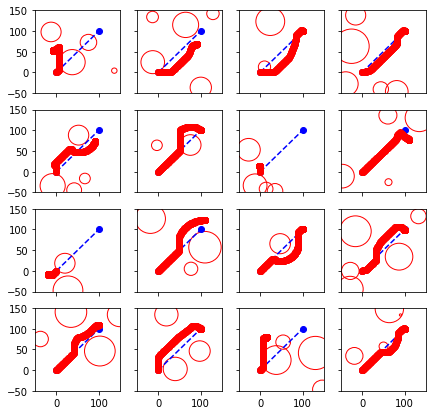

benchmark, bad sol
benchmark, bad sol
benchmark, bad sol
benchmark, good sol
benchmark, bad sol
benchmark, bad sol
benchmark, bad sol
benchmark, good sol
benchmark, bad sol
benchmark, bad sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, bad sol
benchmark, bad sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, bad sol
benchmark, good sol
benchmark, good sol
benchmark, bad sol
benchmark, good sol
ben

In [41]:
######################################
# SPECIFY TEST
ENVIRONMENT_ID = 12345 # random seed for environments, defines the environment list
ENVIRONMENT_COUNT = 100 # number of environments in environment list envs
NUM_DISPLAY_ENVS = 16 # must be perfect square < ENVIRONMENT_COUNT
######################################

# Set problem variables
((x_min, y_min), (x_max, y_max)) = problem.area
((wx_min, wy_min), (wx_max, wy_max)) = problem.waypoints

# Solve environments
envs = environments.generate(ENVIRONMENT_COUNT, ENVIRONMENT_ID)
sols = []
for i, env in enumerate(envs):
    try:
        ######################################
        # Calculate path
        # The path should be a numpy array 
        #        [[x1, x2, x3, ..., xn],
        #         [y1, y2, y3, ..., yn]]
        # where (x1,y1) and (xn,yn) are the start and end points.
        
        rule = pickle.load(open('./fpi_nn_models/nnfpi_94', 'rb'))
                
        #for obs in env:
        #    print(obs)
        l = [np.array( list(obs[:2]) + [0] ) for obs in env]
        r = [obs[2] for obs in env]
        
        while (len(l) < 5):
            l.append(np.array([-50,-50,0]))
            r.append(1)
        
        data = fpi_nn.test(rule, locs=l, rads=r)
        x = np.array([data[i,0] for i in range(len(data))])
        y = np.array([data[i,1] for i in range(len(data))])
        
        flight_path = np.vstack( (x,y) )
        
        #####################################
        
    except Exception as e:
        print(e)
        flight_path = np.array([[wx_min, wx_max], [wy_min, wy_max]])

    sols.append(flight_path)

# Display Solution Paths
draw.grid(NUM_DISPLAY_ENVS, envs, sols)

# Calculate benchmarks
benchmarks = benchmark.run(envs, sols)
print(benchmarks)
print("Score: {}".format(benchmarks["score"]))

In [ ]:
rule, perfs, past = pickle.load(open('overnight.pickle', 'rb'))
deep_data = pickle.load(open("nn_fpi_5obs_curve_data", 'rb'))

fpi_nn.plot_learning_curve(np.array(deep_data),np.array(perfs))

In [ ]:
model = pickle.load(open("neural_fpi_td_bf", "rb"))


In [ ]:
fpi_nn.test(model)

In [44]:
model94 = pickle.load(open("./fpi_nn_models/nnfpi_94", "rb"))
score = fpi_nn.full_test(model94, (1,1000), 15)[0]
print(score)

0.781
